In [1]:
import ndjson
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
with open('../../data/1112model.ndjson') as f:
    data = ndjson.load(f)
df = pd.io.json.json_normalize(data)
#df = df[df["kana"] == "g"].reset_index()
df.head()

,events,kana
0,"[[u, down, 1482], [y, down, 1594], [n, down, 1...",a
1,"[[u, down, 882], [y, down, 994], [b, down, 118...",a
2,"[[u, down, 903], [y, down, 1000], [g, down, 10...",a
3,"[[u, down, 394], [y, down, 586], [t, down, 682...",a
4,"[[u, down, 480], [y, down, 576], [g, down, 688...",a


In [77]:
with open('../../data/1112model.ndjson') as f:
    data = ndjson.load(f)
df_shinoda = pd.io.json.json_normalize(data)
#df_shinoda = df_shinoda[df_shinoda["kana"] == "g"].reset_index()
df_shinoda.head()

,events,kana
0,"[[u, down, 1482], [y, down, 1594], [n, down, 1...",a
1,"[[u, down, 882], [y, down, 994], [b, down, 118...",a
2,"[[u, down, 903], [y, down, 1000], [g, down, 10...",a
3,"[[u, down, 394], [y, down, 586], [t, down, 682...",a
4,"[[u, down, 480], [y, down, 576], [g, down, 688...",a


In [78]:
df_events = pd.DataFrame(df_shinoda["events"])
df_events.head()

,events
0,"[[u, down, 1482], [y, down, 1594], [n, down, 1..."
1,"[[u, down, 882], [y, down, 994], [b, down, 118..."
2,"[[u, down, 903], [y, down, 1000], [g, down, 10..."
3,"[[u, down, 394], [y, down, 586], [t, down, 682..."
4,"[[u, down, 480], [y, down, 576], [g, down, 688..."


In [79]:
time_arrange(df_events["events"][0])

[0, 112, 304, 512, 608, 704]

In [86]:
def time_arrange(events_list):
    out_list = []
    for i in range(len(events_list)):
        #print(events_list[i][2] - events_list[0][2])
        out_list.append([events_list[i][0], "down", events_list[i][2] - events_list[0][2]])
    return out_list

In [81]:
df_shinoda["events"] = df_shinoda["events"].apply(time_arrange)

In [78]:
def time_plot(df, index):
    df_events = pd.DataFrame(df["events"][index])
    df_events = pd.DataFrame(df["events"][index])
    df_events["flag"] = 1
    df_events.plot(x = 2, y = ["flag"], kind = "scatter")
    plt.xlim(0,800)
    return

Google
shinodata


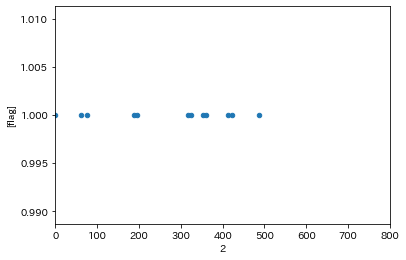

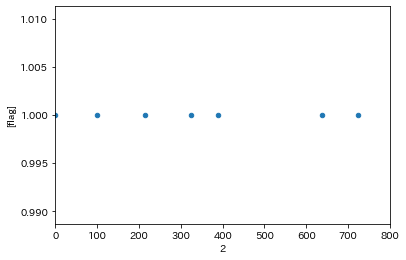

In [85]:
print("Google")
time_plot(df, 4)
print("shinodata")
time_plot(df_shinoda, 4)

In [66]:
data = [[1,2,3],[1,2,3]]
labels = [[0,0,0],[0,0,0]]
l = list(zip(data, labels))
np.random.shuffle(l)
data, labels = zip(*l)

data = list(data)
labels = list(labels)

In [67]:
data
labels

[[0, 0, 0], [0, 0, 0]]

In [92]:
#1112時点の前処理
with open('../../data/1112model_abc.ndjson') as f:
    data = ndjson.load(f)
df_shinoda = pd.io.json.json_normalize(data)
#df_shinoda = df_shinoda[df_shinoda["kana"] == "g"].reset_index()
df_shinoda.head()
df_shinoda["events"] = df_shinoda["events"].apply(time_arrange)
df_shinoda.head()
#with open('/Users/sanoyuki/3*3data.ndjson') as f:
#    data = ndjson.load(f)
#df_shinoda = pd.io.json.json_normalize(data)
df_shinoda = df_shinoda.sample(frac=1)
data = df_shinoda.to_dict('records')
with open('../../data/1112model_shuffle_abc.ndjson', 'w') as f:
    ndjson.dump(data, f)

In [56]:
df_shinoda.head()

,events,kana
0,"[[u, down, 0], [y, down, 1594], [n, down, 1786...",a
1,"[[u, down, 0], [y, down, 994], [b, down, 1186]...",a
2,"[[u, down, 0], [y, down, 1000], [g, down, 1096...",a
3,"[[u, down, 0], [y, down, 586], [t, down, 682],...",a
4,"[[u, down, 0], [y, down, 576], [g, down, 688],...",a


In [51]:
with open('../../data/1112model_shuffle_abc.ndjson') as f:
    data = ndjson.load(f)
df_shinoda = pd.io.json.json_normalize(data)
def delete_down(event_list):
    for event in event_list:
        event.pop(1)
    return event_list
df_shinoda["events"].apply(delete_down)
df_shinoda.head()

,events,kana
0,"[[h, 0], [n, 784], [y, 1088]]",i
1,"[[h, 0], [n, 1088], [g, 1280], [y, 1488]]",j
2,"[[g, 0], [j, 788], [y, 996], [n, 1284], [m, 13...",e
3,"[[y, 0], [h, 1168], [n, 1280]]",l
4,"[[t, 0], [g, 977], [b, 1073], [h, 1265], [b, 1...",k


In [89]:
input_list = df_shinoda["events"][0]

In [48]:
delete_down(df_shinoda["events"][0])

[['h', 0], ['n', 784], ['y', 1088]]

In [90]:
[d[0] for d in input_list]

['u', 'y', 'n', 'u', 'j', 'm']

In [91]:
input_list

[['u', 'down', 0],
 ['y', 'down', 112],
 ['n', 'down', 304],
 ['u', 'down', 512],
 ['j', 'down', 608],
 ['m', 'down', 704]]